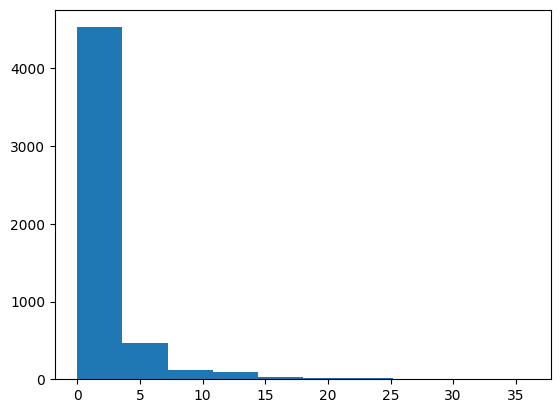

Correlazione tra Gf e Ass: 0.5551357811731772
Mean Squared Error: 2.132663273976374
Giocatore 'dybala' non trovato, usando giocatore simile: Dybala
dybala potrebbe fare 3.84 assist


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz

# Caricamento dei dati
dataset1 = pd.read_csv("datasets/datasetGol.csv", sep=";")
dataset2 = pd.read_csv("datasets/Statistiche_Fantacalcio_Stagione_2024_25.csv", sep=";")

dataset1["Mv"] = dataset1["Mv"].str.replace(",", ".").astype(float)
dataset1["Fm"] = dataset1["Fm"].str.replace(",", ".").astype(float)
dataset2["Mv"] = dataset2["Mv"].str.replace(",", ".").astype(float)
dataset2["Fm"] = dataset2["Fm"].str.replace(",", ".").astype(float)

# Distribuzione di un dato specifico
plt.hist(dataset1['Gf'])
plt.show()

# Correlazione tra variabili
correlation = dataset1['Gf'].corr(dataset1['Ass'])
print("Correlazione tra Gf e Ass:", correlation)

# Definizione variabili
X = dataset1[["Gf", "Mv", "Fm", "Rc"]]
y = dataset1['Ass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizzazione delle variabili
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Predizione e valutazione del modello
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Funzione per la previsione degli assist
def predict_assist(player_data):
    if player_data.empty:
        print("No player data found.")
        return None  

    player_data_normalized = ss.transform(player_data[["Gf", "Mv", "Fm", "Rc"]])
    predicted_assist = model.predict(player_data_normalized).mean()
    return predicted_assist

# Funzione per trovare un giocatore simile
def find_similar_player(player_name):
    highest_score = -float('inf')
    most_similar_player = None
    for name in dataset2['Nome'].values:
        score = fuzz.ratio(player_name.lower(), name.lower()) 
        if score > highest_score:
            highest_score = score
            most_similar_player = dataset2[dataset2['Nome'] == name]
    return most_similar_player

# Input utente
giocatore = str(input("Inserisci il nome del giocatore: "))

# Ricerca del giocatore e previsione
player_data = dataset1[dataset1['Nome'] == giocatore]
while player_data.empty:
    similar_player = find_similar_player(giocatore)
    if similar_player is not None:
        player_data = dataset1[dataset1['Nome'] == similar_player['Nome'].values[0]]
        print(f"Giocatore '{giocatore}' non trovato, usando giocatore simile: {similar_player['Nome'].values[0]}")
    else:
        print(f"Il giocatore {giocatore} non è stato trovato")
        break  

# Calcolo degli assist previsti
predicted_assist = predict_assist(player_data)
if predicted_assist is not None:
    print(f"{giocatore} potrebbe fare {predicted_assist:.2f} assist")
else:
    print("Impossibile calcolare gli assist per il giocatore indicato.")
